In [44]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from IPython.display import display, HTML
import numpy as np
import json
from scipy import stats
import math

from datetime import datetime
plt.rcParams["figure.figsize"] = (17, 5) # (w, h)

In [59]:
root = '../data_storage'
file_names = []
dates = []

for subdir, dirs, files in os.walk(root):
    for file in files:
        file_names.append(os.path.join(subdir, file).replace('\\', '/'))
        
        datetime_object = datetime.strptime(file[5:-9], '%d %b %Y %H:%M:%S')
        dates.append(datetime_object)
        
youngest = max(dates)

for file in files:
    datetime_object = datetime.strptime(file[5:-9], '%d %b %Y %H:%M:%S')
    if(datetime_object == youngest):
        youngest = '../data_storage/' + file

In [107]:
main_frame = pd.DataFrame()
length = []

for f in file_names:
    df = pd.read_json(f)
    current_date = datetime.strptime(f[21:-9], '%d %b %Y %H:%M:%S')
    df['created_at'] = current_date
    length.append([current_date, len(df.index)])
    main_frame = main_frame.append(df)
    
youngest_frame = pd.read_json(youngest)
number_of_hospitals = pd.DataFrame(length, columns = ['collection_date', 'hospital_number']) 

# Zahl der Krankenhäuser

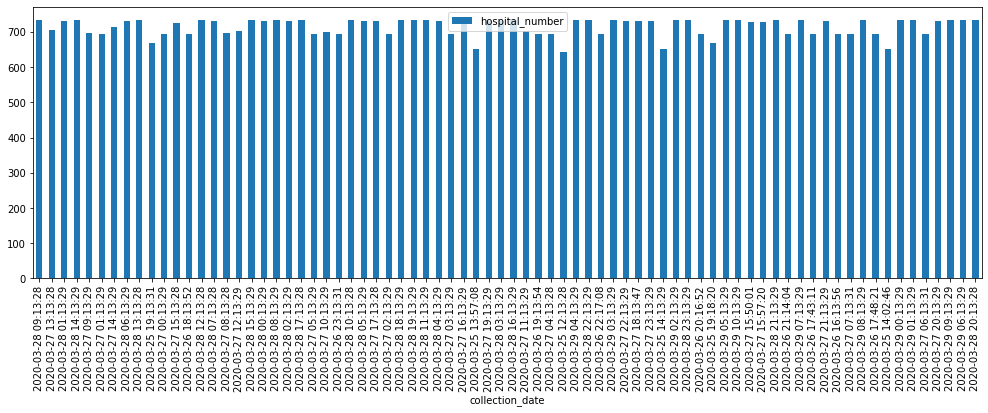

In [108]:
number_of_hospitals.collection_date = pd.to_datetime(number_of_hospitals['collection_date'])
number_of_hospitals.set_index('collection_date', inplace=True)
number_of_hospitals.plot(kind="bar")

In [57]:
youngest_frame

,hospital,contact,fed,icu_low_care,icu_high_care,updated,ecmo
0,"Spreewaldklinik Lübben, Anä / IT, Schillerstra...",ITS Website,BB,green,green,"29.03.2020, 10:40",NaN
1,"Kreisklinik Wolfratshausen, Moosbauerweg 5, 82...",Website,BY,green,green,"29.03.2020, 08:32",NaN
2,"Klinikum-Bremen-Nord, Klinik für Anästhesiolog...",Intensivstation Website,HB,green,green,"29.03.2020, 12:11",NaN
3,"Helios Frankenwaldklinik Kronach, Anästhesie, ...",4a Website,BY,yellow,yellow,"27.03.2020, 17:00",NaN
4,"St. Irmgardis Süchteln GmbH, Anästhesiologie, ...",Intensivstation Website,NRW,green,green,"27.03.2020, 16:10",NaN
...,...,...,...,...,...,...,...
730,"Universitätsklinikum Gießen / Marburg, Rudolf-...",Website,HE,green,green,"18.03.2020, 14:01",green
731,"Universitätsklinikum Dresden, Klinik für Anäst...",ARDS/ECMO Zentrum Dresden (ANE-ITS) Website,SN,green,green,"27.03.2020, 12:54",green
732,"Universitätsklinikum Bonn, Klinik und Poliklin...",Operative Intensivmedizin Website,NRW,green,green,"28.03.2020, 18:49",green
733,"Helios Klinikum Bad Saarow, Klinik für Anästhe...","ITS 1, ITS 2, ITS 3 Website",BB,green,green,"29.03.2020, 10:10",green


# Anzahl der Krankenhäuser pro Bundesland

# Letzter Stand

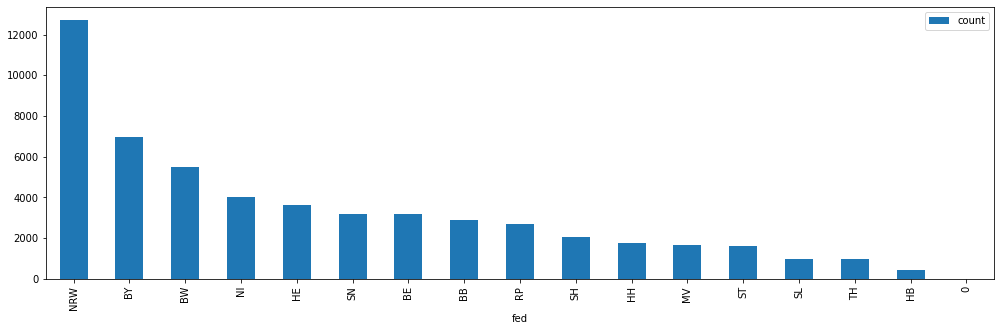

In [109]:
fed_count = pd.DataFrame({'count' : main_frame.groupby('fed').count()['hospital']}).reset_index()
fed_count = fed_count.sort_values(by=['count'], ascending=False)
fed_count = fed_count.set_index('fed')

fed_count.plot(kind='bar')

# Anzahl der Betten - Intensivbetten ohne invasive Beatmungsmöglichkeit (Monitoring, Überwachung, ggf. nicht-invasive Beatmung möglich)

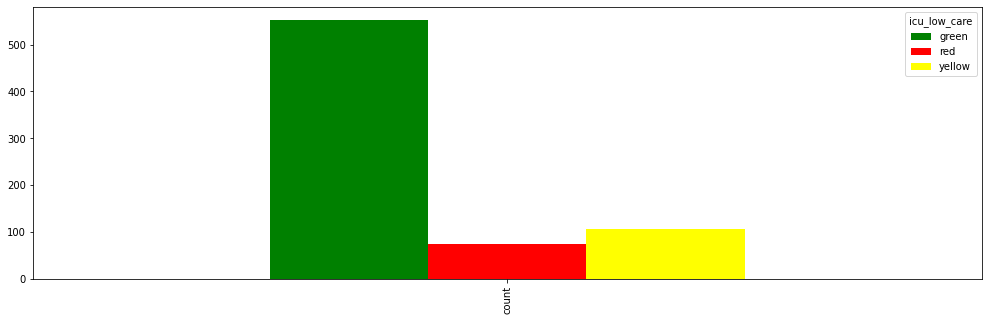

In [110]:
status_icu_low_care_count = pd.DataFrame({'count' : youngest_frame.groupby('icu_low_care').count()['hospital']}).reset_index()
status_icu_low_care_count  = status_icu_low_care_count.set_index('icu_low_care')

status_icu_low_care_count.transpose().plot(kind="bar", color=['green', 'red', 'yellow'])

# Anzahl der Betten - Intensivbetten mit invasiver Beatmungsmöglichkeit (Beatmungsbetten)

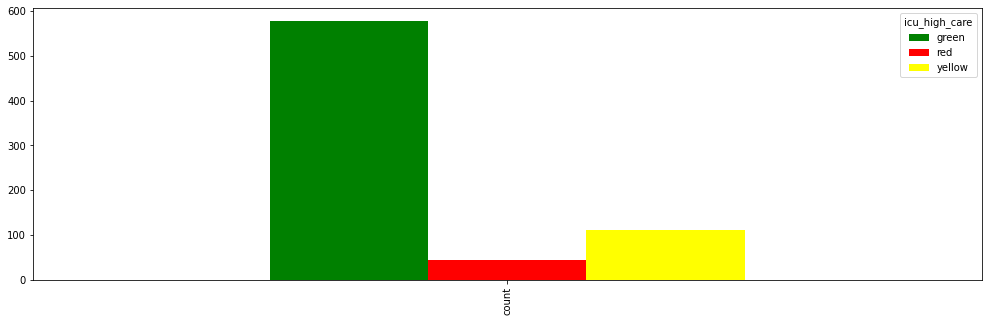

In [111]:
status_icu_high_care_count = pd.DataFrame({'count' : youngest_frame.groupby('icu_high_care').count()['hospital']}).reset_index()
status_icu_high_care_count  = status_icu_high_care_count.set_index('icu_high_care')

status_icu_high_care_count.transpose().plot(kind="bar", color=['green', 'red', 'yellow'])



# Zeitlicher Verlauf der Betten-Belegung

In [112]:
#pd.DataFrame({'count' : main_frame.groupby('updated').count()['hospital']}).reset_index()
column_values = main_frame[["icu_low_care", "updated", "hospital"]].values
index = pd.Index(column_values)

frame = index.to_frame()
frame.columns = ["All"]
frame = frame.reset_index().drop(['index'], axis=1)
frame['freq'] = frame.groupby('All')['All'].transform('count')
print(frame)

                                                     All  freq
0      (green, 28.03.2020, 08:48, Kreisklinik Wolfrat...    23
1      (green, 27.03.2020, 18:20, Klinikum-Bremen-Nor...    22
2      (yellow, 27.03.2020, 17:00, Helios Frankenwald...    43
3      (green, 27.03.2020, 16:10, St. Irmgardis Sücht...    46
4      (yellow, 27.03.2020, 16:00, Schön Klinik Bad S...    46
...                                                  ...   ...
54312  (yellow, 27.03.2020, 07:59, Brüderkrankenhaus ...    54
54313  (green, 26.03.2020, 12:50, Universitätskliniku...    67
54314  (green, 27.03.2020, 15:15, Universitätskliniku...    46
54315  (green, 20.03.2013, 09:26, Klinikum Nürnberg, ...    72
54316  (green, 26.03.2020, 16:15, Elisabeth-Krankenha...    70

[54317 rows x 2 columns]


In [113]:
index = pd.Index([2, 2, 2, 5,5,5,5,5,5, 3, 4,4,4,4])
index.value_counts()

main_frame = main_frame.drop_duplicates(subset=df.columns.difference(['created_at']), keep='first', inplace=False)

main_frame['updated'] = main_frame['updated'].map(lambda x: str(x)[:-2]+"00")
main_frame

,hospital,contact,fed,icu_low_care,icu_high_care,updated,ecmo,created_at
0,"Kreisklinik Wolfratshausen, Moosbauerweg 5, 82...",Website,BY,green,green,"28.03.2020, 08:00",NaN,2020-03-28 09:13:28
1,"Klinikum-Bremen-Nord, Klinik für Anästhesiolog...",Intensivstation Website,HB,green,green,"27.03.2020, 18:00",NaN,2020-03-28 09:13:28
2,"Helios Frankenwaldklinik Kronach, Anästhesie, ...",4a Website,BY,yellow,yellow,"27.03.2020, 17:00",NaN,2020-03-28 09:13:28
3,"St. Irmgardis Süchteln GmbH, Anästhesiologie, ...",Intensivstation Website,NRW,green,green,"27.03.2020, 16:00",NaN,2020-03-28 09:13:28
4,"Schön Klinik Bad Staffelstein, Neurologie, Am ...",Frührehabiltation Website,BY,yellow,red,"27.03.2020, 16:00",NaN,2020-03-28 09:13:28
...,...,...,...,...,...,...,...,...
84,"Rotkreuzklinikum München, Interdisziplinäre In...",Website,BY,green,red,"29.03.2020, 09:00",NaN,2020-03-29 08:13:29
202,"Helios Park-Klinikum Leipzig, Strümpelstraße 4...",Website,SN,yellow,green,"29.03.2020, 10:00",NaN,2020-03-29 08:13:29
318,"Kliniken HochFranken, Zentrale Anästhesie und ...",Münchberg Station 1A Naila Station O2 Website,BY,yellow,green,"29.03.2020, 09:00",NaN,2020-03-29 08:13:29
499,"Malteser Krankenhaus St. Hildegardis, Abteilun...",Interdisziplinäre Intensivstation Website,NRW,green,green,"29.03.2020, 10:00",NaN,2020-03-29 08:13:29


# Zeitlicher Verlauf - icu_low_care

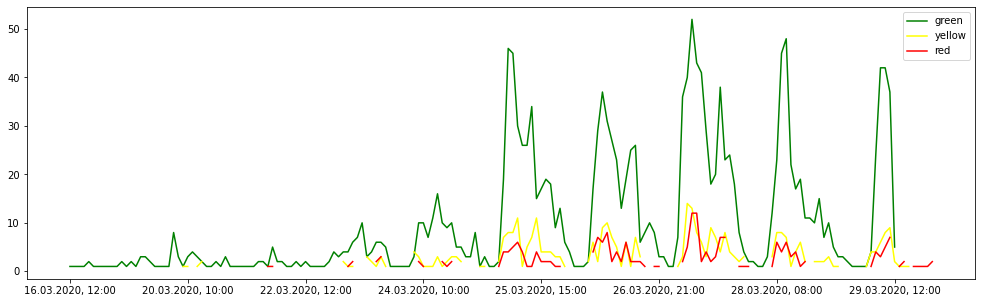

In [114]:
status_low_green = main_frame.loc[main_frame['icu_low_care'] == "green"].groupby('updated').count()['hospital'].to_frame()
status_low_green = status_low_green.rename(columns={"hospital": "green"})
status_low_yellow = main_frame.loc[main_frame['icu_low_care'] == "yellow"].groupby('updated').count()['hospital'].to_frame()
status_low_yellow = status_low_yellow.rename(columns={"hospital": "yellow"})
status_low_red = main_frame.loc[main_frame['icu_low_care'] == "red"].groupby('updated').count()['hospital'].to_frame()
status_low_red = status_low_red.rename(columns={"hospital": "red"})

result = pd.concat([status_low_green, status_low_yellow, status_low_red], axis=1)
result.plot(kind="line",  color=['green', 'yellow', 'red'])


# Zeitlicher Verlauf - icu_high_care

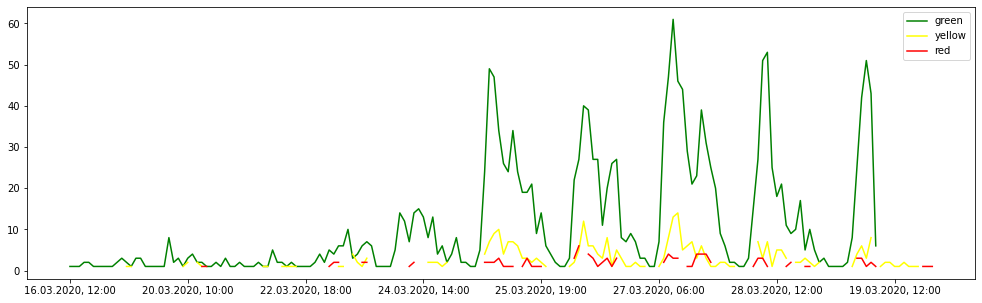

In [115]:
status_high_green = main_frame.loc[main_frame['icu_high_care'] == "green"].groupby('updated').count()['hospital'].to_frame()
status_high_green = status_high_green.rename(columns={"hospital": "green"})
status_high_yellow = main_frame.loc[main_frame['icu_high_care'] == "yellow"].groupby('updated').count()['hospital'].to_frame()
status_high_yellow = status_high_yellow.rename(columns={"hospital": "yellow"})
status_high_red = main_frame.loc[main_frame['icu_high_care'] == "red"].groupby('updated').count()['hospital'].to_frame()
status_high_red = status_high_red.rename(columns={"hospital": "red"})

result = pd.concat([status_high_green, status_high_yellow, status_high_red], axis=1)
result.plot(kind="line",  color=['green', 'yellow', 'red'])

# Zeitlicher Verlauf - ecmo

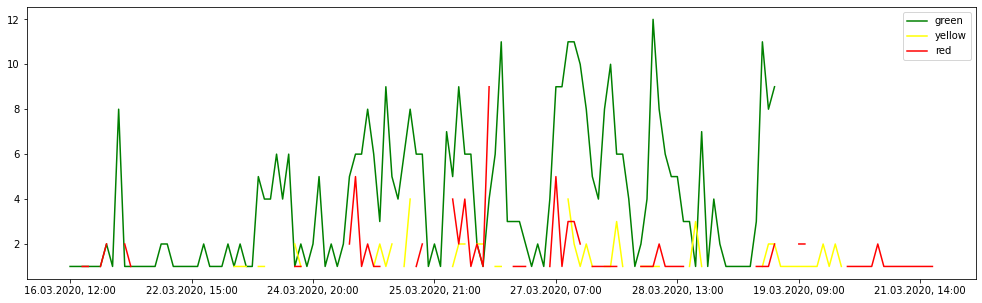

In [116]:
status_ecmo_green = main_frame.loc[main_frame['ecmo'] == "green"].groupby('updated').count()['hospital'].to_frame()
status_ecmo_green = status_ecmo_green.rename(columns={"hospital": "green"})
status_ecmo_yellow = main_frame.loc[main_frame['ecmo'] == "yellow"].groupby('updated').count()['hospital'].to_frame()
status_ecmo_yellow = status_ecmo_yellow.rename(columns={"hospital": "yellow"})
status_ecmo_red = main_frame.loc[main_frame['ecmo'] == "red"].groupby('updated').count()['hospital'].to_frame()
status_ecmo_red = status_ecmo_red.rename(columns={"hospital": "red"})

result = pd.concat([status_ecmo_green, status_ecmo_yellow, status_ecmo_red], axis=1)
result.plot(kind="line",  color=['green', 'yellow', 'red'])